In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
base_df = pd.read_csv('crime.csv')

In [4]:
#converting to datetime for time comparision
Dat = pd.to_datetime(base_df.Dispatch_Date_Time)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


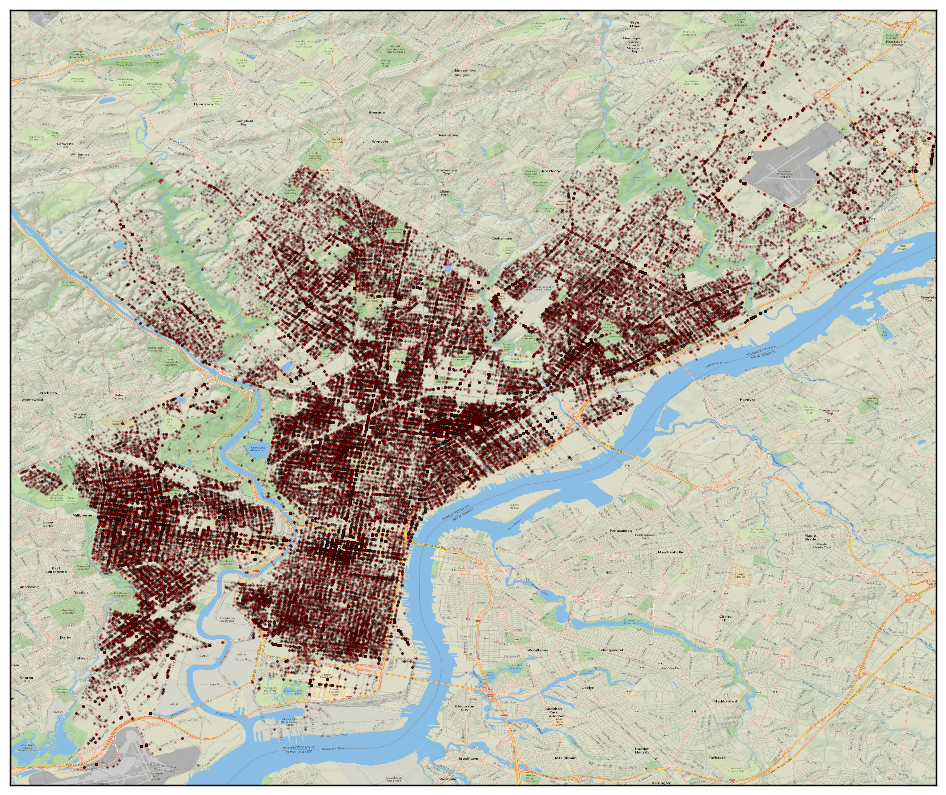

In [5]:
m = Basemap(projection='mill', llcrnrlat=base_df.Lat.min(), urcrnrlat=base_df.Lat.max(), 
            llcrnrlon=base_df.Lon.min(), urcrnrlon=base_df.Lon.max(), resolution='c', epsg=4269)

longitudes = list(base_df.Lon[(base_df.Lon.isnull()==False) & (Dat.dt.year == 2016)])
latitudes = list(base_df.Lat[(base_df.Lat.isnull() == False) & (Dat.dt.year == 2016)])
x, y = m(longitudes, latitudes)

m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
plt.figure(figsize=(20,10))
m.plot(x,y,'ro', markersize=1, alpha=.3 )


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


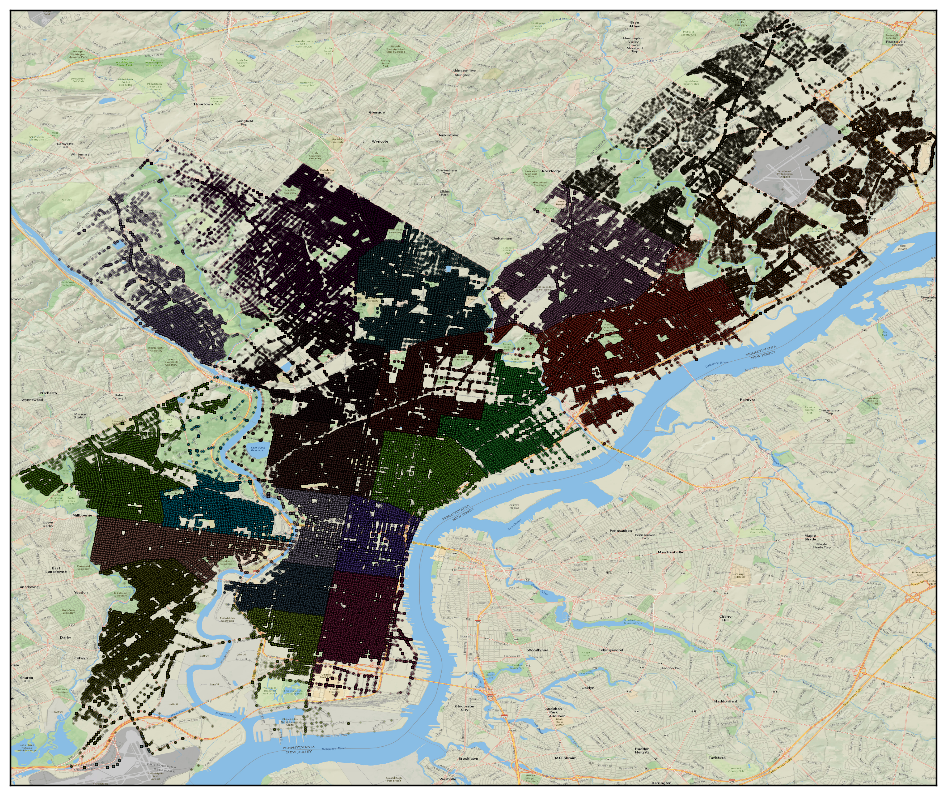

In [34]:
color = np.random.rand(base_df.Police_Districts.unique().shape[0], 3)
plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=base_df.Lat.min(), urcrnrlat=base_df.Lat.max(), 
            llcrnrlon=base_df.Lon.min(), urcrnrlon=base_df.Lon.max(), resolution='c', epsg=4269)
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)

c = 0
longitudes = list(base_df.Lon[(base_df.Lon.isnull()==False) & (base_df.Police_Districts == i)])
latitudes = list(base_df.Lat[(base_df.Lat.isnull() == False) & (base_df.Police_Districts == i)])
for i in base_df.Police_Districts.unique():
    
    x, y = m(longitudes, latitudes)
    m.plot(x,y,'ro',markersize=1,alpha=.3, color = color[c] )
    c += 1
